In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image7
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import layers
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

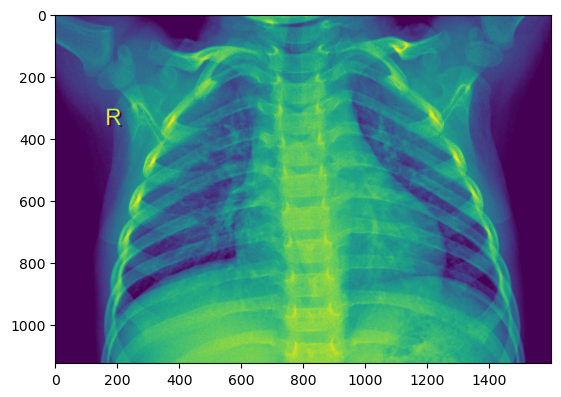

In [4]:
image = imread(r'archive\train\NORMAL\IM-0125-0001.jpeg')
plt.imshow(image)
plt.show()

In [5]:
train_dataset_path = r'archive\train'
test_dataset_path = r'archive\test'
val_dataset_path = r'archive\val'

batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 69 files belonging to 2 classes.
Found 17 files belonging to 2 classes.
Found 33 files belonging to 2 classes.


In [6]:
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

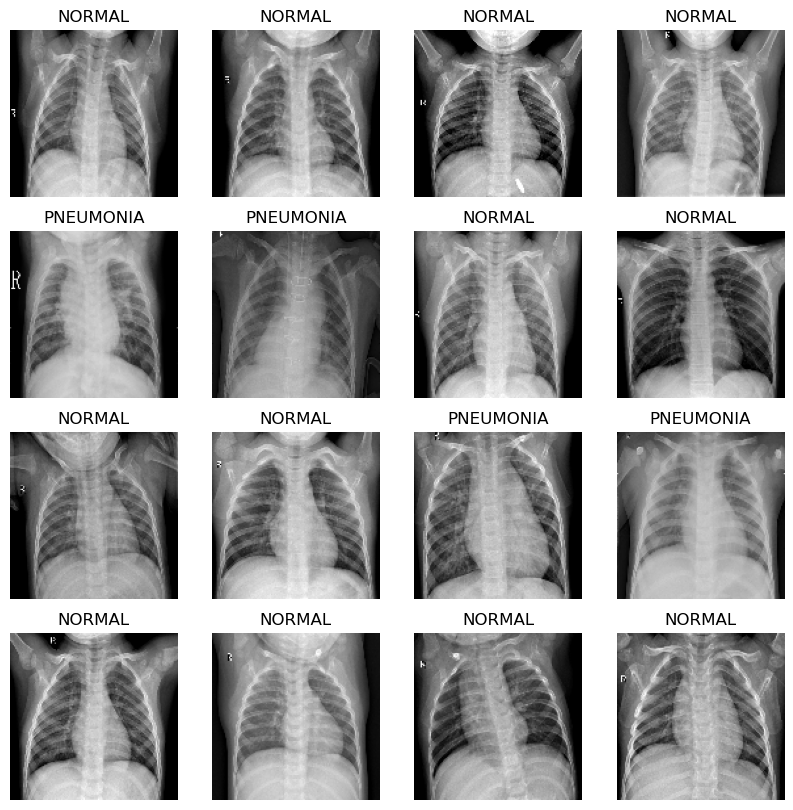

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [18]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                 

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
3/3 [==============================] - 1s 147ms/step - loss: 0.2227 - accuracy: 0.9130 - val_loss: 0.7436 - val_accuracy: 0.8235
Epoch 2/30
3/3 [==============================] - 1s 165ms/step - loss: 0.2030 - accuracy: 0.8841 - val_loss: 0.7982 - val_accuracy: 0.8235
Epoch 3/30
3/3 [==============================] - 0s 140ms/step - loss: 0.1838 - accuracy: 0.8696 - val_loss: 0.4531 - val_accuracy: 0.9412
Epoch 4/30
3/3 [==============================] - 1s 171ms/step - loss: 0.1994 - accuracy: 0.9420 - val_loss: 0.4798 - val_accuracy: 0.9412
Epoch 5/30
3/3 [==============================] - 1s 257ms/step - loss: 0.1579 - accuracy: 0.9855 - val_loss: 0.6941 - val_accuracy: 0.8824
Epoch 6/30
3/3 [==============================] - 1s 168ms/step - loss: 0.1448 - accuracy: 0.9565 - val_loss: 0.7458 - val_accuracy: 0.8824
Epoch 7/30
3/3 [==============================] - 1s 156ms/step - loss: 0.1944 - accuracy: 0.8841 - val_loss: 0.5840 - val_accuracy: 0.9412
Epoch 8/30
3/3 [====

In [29]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 7ms/step - loss: 0.4833 - accuracy: 0.8788


[0.48328229784965515, 0.8787878751754761]

In [30]:
model.save('final.h5')